In [1]:
# Start Thunder and get thunder constant
print 'Starting Thunder Now. Check console for details'
from thunder import ThunderContext

tsc = ThunderContext.start(appName="thunderpca")

Starting Thunder Now. Check console for details


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import shape, convolve, r_, hanning

%matplotlib inline
sns.set_context('notebook');
from thunder import Colorize
image = Colorize.image

In [3]:
FolderName = '/Users/seetha/Desktop/Habenula_Variation/Data/Habenula_AF4_Blue_Redx3/Tiff/Registered/Sorted/Fish1253/dHb/'

In [4]:
data = tsc.loadImages(FolderName, inputFormat='tif')
# data = data.medianFilter(size=4)
data = data.toTimeSeries() #detrend(method='linear',order=10)

examples = data.subset(nsamples=100, thresh=100)

plt.plot(examples.T);

In [15]:
stdvec = data.stdev()
A = data.applyValues(lambda x: x / stdvec, keepIndex=True)
B = A.pack()

Dimensions of array.. min=(0, 0), max=(127, 511), count=(128, 512)
Dimensions of result.. (65536, 285)
Dimensions of nout,.. 285


In [114]:
A1 = data.applyValues(lambda x: smooth_func(x), keepIndex=True)
# B1 = data._constructor(A1, index='mean').__finalize__(data, noPropagate=('_dtype',))
# B2 = A1.pack()

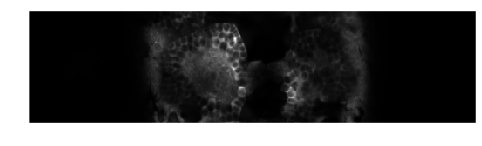

In [102]:
image(np.mean(B2,0))

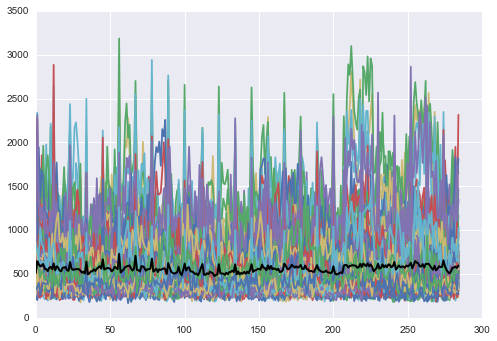

In [104]:
examples = data.subset(nsamples=200, thresh=100)
with sns.axes_style('darkgrid'):
    plt.plot(examples.T);
    plt.plot(np.mean(examples,0), 'k', linewidth=2)

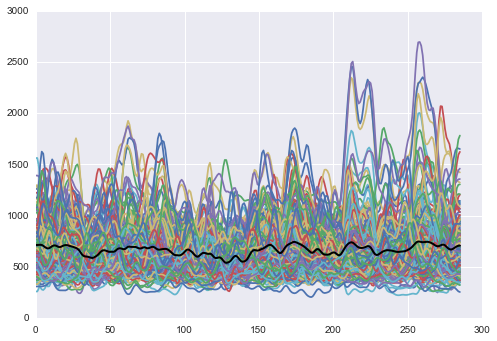

In [115]:
examples = A1.subset(nsamples=200, thresh=100)
with sns.axes_style('darkgrid'):
    plt.plot(examples.T);
    plt.plot(np.mean(examples,0), 'k', linewidth=2)

In [45]:
def smooth_func(x, window_len=10):
        print type(x) 
        print shape(x)
        s = r_[x[window_len - 1:0:-1], x, x[-1:-window_len:-1]]
        print shape(s)
        w = np.ones(window_len,'d')
        y = convolve(w / w.sum(), s, mode='valid')
        print 'Size of y...', shape(y)
        return y[window_len/2:-window_len/2+1]

In [46]:
from numpy import *
from pylab import *

t=linspace(-4,4,100)
x=sin(t)
xn=x+randn(len(t))*0.1
y=smooth_func(x)
print shape(y)

<type 'numpy.ndarray'>
(100,)
(118,)
Size of y... (109,)
(100,)


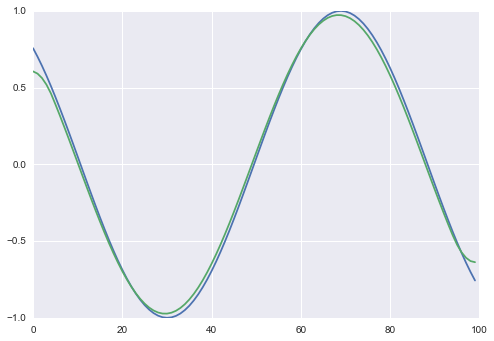

In [47]:
plt.plot(x)
plt.plot(y)
